In [14]:
import seaborn as sns
import numpy as np
import pandas as pd
from lmsc import LSMCPricer
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

In [18]:
spots = np.linspace(36, 44, 9)
smooth_spots = np.linspace(36, 44, 64)
data = pd.read_csv("data.csv")
strike = 40.00
rate = 0.06

american_color = "#C8B717"
european_color = "#2332A6"

for expiry in [1.00, 2.00]:
    for vol in [0.20, 0.40]:
        ctr = 0

        american = np.zeros(shape=len(spots), dtype=float)
        european = np.zeros(shape=len(spots), dtype=float)

        tmp = data[data["Volatility"] == vol]
        tmp = tmp[tmp["TimeToExpiry"] == expiry]

        for spot in spots:
            pricer = LSMCPricer(
                vol=vol,
                spot=spot,
                rate=rate,
                strike=strike,
                expiry=expiry,
                seeds=[1, 2, 3, 4],
                num_paths=10000,
                num_timesteps=50,
                decision_smoothing=None,
                n_bins=20,
            )

            pricer.price()

            res = pricer.results

            american[ctr] = res[res.Type == "American"].Value.mean()
            european[ctr] = res[res.Type == "European"].Value.mean()

            ctr += 1

        sns.lineplot(
            x=spots,
            y=american,
            label="American",
            color=american_color,
        )
        sns.scatterplot(
            x=spots,
            y=american,
            marker="o",
            edgecolor=american_color,
            facecolor="none",
        )
        sns.lineplot(
            x=spots,
            y=european,
            label="European",
            color=european_color,
        )
        sns.scatterplot(
            x=spots,
            y=european,
            marker="o",
            edgecolor=european_color,
            facecolor="none",
        )
        sns.lineplot(
            x=smooth_spots,
            y=np.maximum(strike - smooth_spots, 0),
            label="American lower",
            linestyle="--",
            color=american_color,
        )
        sns.lineplot(
            x=smooth_spots,
            y=np.maximum(np.exp(-rate * expiry) * strike - smooth_spots, 0),
            label="European lower",
            linestyle="--",
            color=european_color,
        )
        sns.scatterplot(
            data=tmp,
            x="Spot",
            y="SimAmerican",
            marker="x",
            color=american_color,
            s=50,
            linewidth=1,
            label="American Data",
            zorder=100,
        )
        sns.scatterplot(
            data=tmp,
            x="Spot",
            y="European",
            marker="x",
            color=european_color,
            s=50,
            linewidth=1,
            label="European Data",
            zorder=100,
        )
        ax = plt.gca()
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 0.75))
        plt.title(
            f"Fit for $T={expiry:.0f}$ and $\\sigma={100*vol:.0f}\\%$", fontsize=18
        )
        plt.savefig(f"Fit_T={expiry}_Vol={vol}.png", dpi=300, bbox_inches="tight")
        plt.close()

In [ ]:
ps = [1000 * 2**i for i in [3, 4, 5, 6, 7, 8]]
seeds = [1, 2, 3, 4, 5]
spot = 38.00
dfs = []

for p in ps:
    pricer = LSMCPricer(
        vol=vol,
        spot=spot,
        rate=rate,
        strike=strike,
        expiry=expiry,
        seeds=seeds,
        num_paths=p,
        num_timesteps=50,
        n_bins=50,
    )

    pricer.price()

    res = pricer.results
    res["Paths"] = p
    dfs.append(res)


df = pd.concat(dfs)

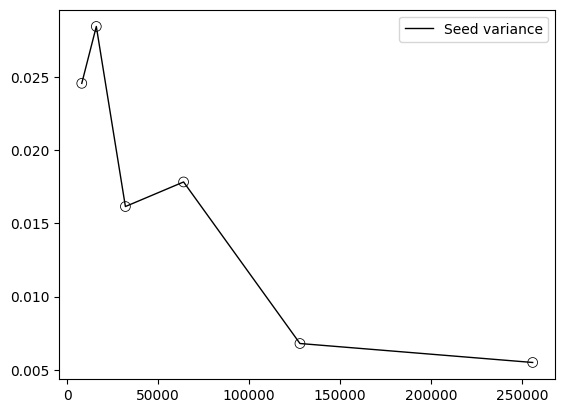

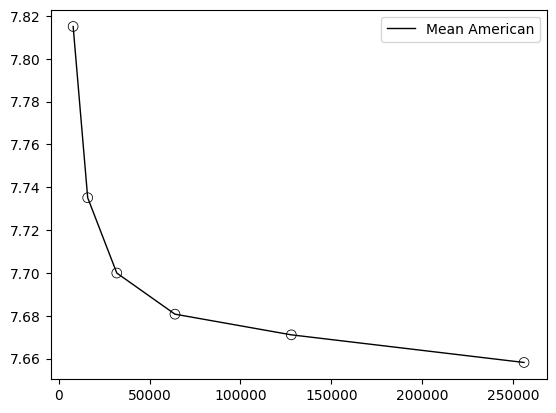

In [9]:
means = []
stds = []

for p in df["Paths"].unique():
    fil = df[df["Type"] == "American"]
    fil = fil[fil["Paths"] == p]
    mean = fil["Value"].mean()
    std = fil["Value"].std(ddof=1)
    means.append(mean)
    stds.append(std)

sns.lineplot(
    x=df["Paths"].unique(), y=stds, color="k", linewidth=1, label="Seed variance"
)
sns.scatterplot(x=df["Paths"].unique(), y=stds, edgecolor="k", facecolor="none", s=50)
plt.show()
plt.close()


sns.lineplot(
    x=df["Paths"].unique(), y=means, color="k", linewidth=1, label="Mean American"
)
sns.scatterplot(x=df["Paths"].unique(), y=means, edgecolor="k", facecolor="none", s=50)
plt.show()
plt.close()

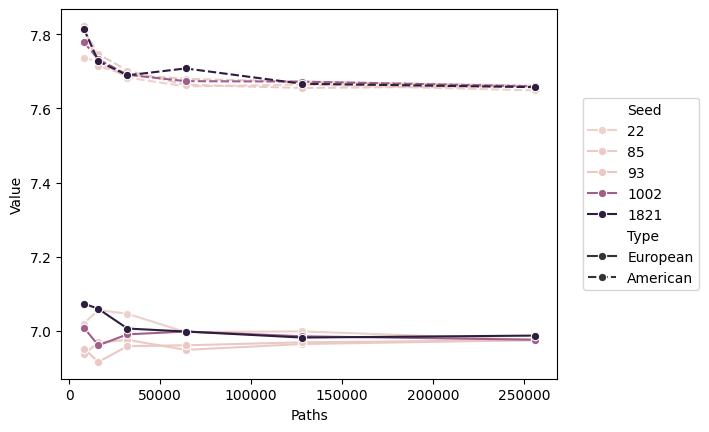

In [5]:
ax = sns.lineplot(data=df, x="Paths", y="Value", hue="Seed", style="Type", marker="o")
sns.move_legend(ax, "center right", bbox_to_anchor=(1.30, 0.5))

In [6]:
ts = [2, 5, 10, 20, 50, 100, 150, 250]
dfs = []
seeds = [1123, 22, 233, 412, 523]

for t in ts:
    pricer = LSMCPricer(
        vol=vol,
        spot=spot,
        rate=rate,
        strike=strike,
        expiry=expiry,
        seeds=seeds,
        num_paths=50000,
        num_timesteps=t,
        n_bins=50,
    )

    pricer.price()
    res = pricer.results
    res["Steps"] = t

    dfs.append(res)


df = pd.concat(dfs)

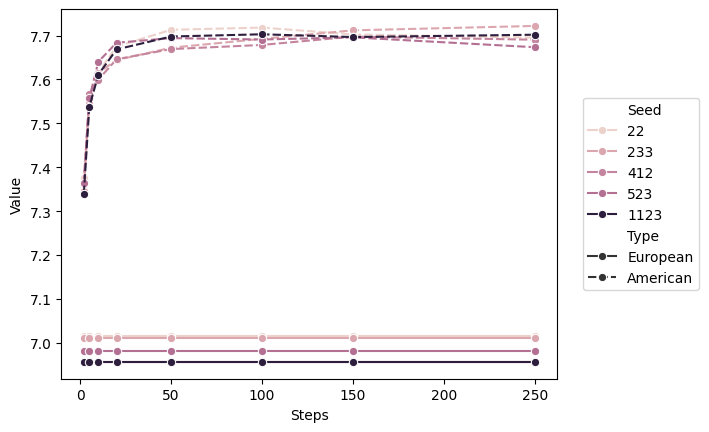

In [7]:
ax = sns.lineplot(data=df, x="Steps", y="Value", hue="Seed", style="Type", marker="o")
sns.move_legend(ax, "center right", bbox_to_anchor=(1.30, 0.5))